# Polynomial Regression

## Dataset

Dataset informasi: 

* **MODELYEAR** e.g. 2015
* **MAKE** e.g. Acura
* **MODEL** e.g. ILX
* **VEHICLE CLASS** e.g. SUV
* **ENGINE SIZE** e.g. 4.7
* **CYLINDERS** e.g. 6
* **TRANSMISSION** e.g. A6
* **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*  **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
* **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
* **CO2 EMISSIONS (g/km)** e.g. 182 --> low --> 0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
data = pd.read_csv('/content/fuel-consumption.csv')
data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


## Analisis dan Visualisasi Data

Cek deskripsii statistiknya

In [ ]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Cek jumlah data untuk tiap jenis kendaraan

In [ ]:
data.MAKE.value_counts()

FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
AUDI             49
GMC              49
TOYOTA           49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
KIA              33
NISSAN           33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
JAGUAR           22
LEXUS            22
INFINITI         21
HONDA            21
CHRYSLER         19
LAND ROVER       19
BUICK            16
MITSUBISHI       16
RAM              13
ACURA            12
LINCOLN          11
VOLVO            11
FIAT             10
SCION             9
BENTLEY           8
ASTON MARTIN      7
ROLLS-ROYCE       7
MASERATI          6
LAMBORGHINI       3
SRT               2
SMART             2
Name: MAKE, dtype: int64

Cek nilai uik pada kolom **`MODEL`**



In [ ]:
data.MODEL.unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', 'RDX AWD', 'RLX', 'TL', 'TL AWD',
       'TSX', 'DB9', 'RAPIDE', 'V8 VANTAGE', 'V8 VANTAGE S', 'VANQUISH',
       'A4', 'A4 QUATTRO', 'A5 CABRIOLET QUATTRO', 'A5 QUATTRO',
       'A6 QUATTRO', 'A6 QUATTRO TDI CLEAN DIESEL', 'A7 QUATTRO',
       'A7 QUATTRO TDI CLEAN DIESEL', 'A8', 'A8 TDI CLEAN DIESEL', 'A8L',
       'A8L TDI CLEAN DIESEL', 'ALLROAD QUATTRO', 'Q5', 'Q5 HYBRID',
       'Q5 TDI CLEAN DIESEL', 'Q7', 'Q7 TDI CLEAN DIESEL', 'R8',
       'R8 SPYDER', 'RS5', 'RS5 CABRIOLET', 'RS7', 'S4', 'S5',
       'S5 CABRIOLET', 'S6', 'S7', 'S8', 'SQ5', 'TT COUPE QUATTRO',
       'TT ROADSTER QUATTRO', 'TTS COUPE QUATTRO', 'TTS ROADSTER QUATTRO',
       'CONTINENTAL GT', 'CONTINENTAL GT CONVERTIBLE',
       'CONTINENTAL GT SPEED CONVERTIBLE', 'CONTINENTAL GTC',
       'FLYING SPUR', 'MULSANNE', '320i', '320i xDRIVE', '328d xDRIVE',
       '328d xDRIVE TOURING', '328i', '328i xDRIVE',
       '328i xDRIVE GRAN TURISMO', '328i xDRIVE TOURING', '335i',
 

Cek nilai unik pada kolom **`VEHICLECLASS`**

In [ ]:
data.VEHICLECLASS.unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'MINICOMPACT', 'SUBCOMPACT',
       'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

Menggunakan *countplot* pada kolom `TRANSMISSION`

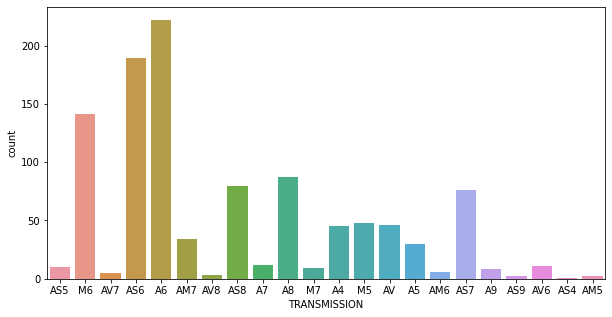

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=data.TRANSMISSION)


Pada kolom numerik menggunakan histogram untuk melihat distribusi data

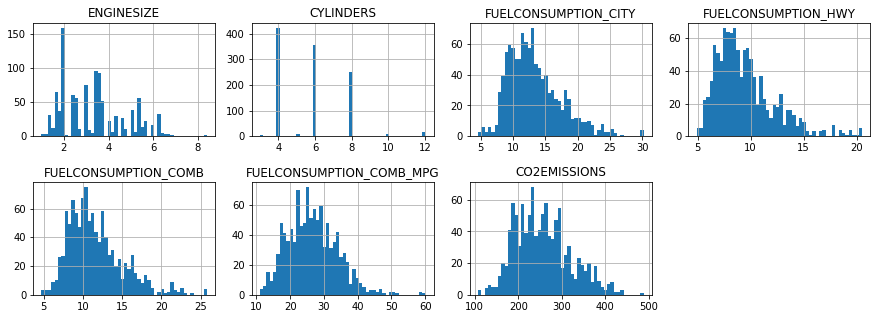

In [ ]:
# menampilkan histogram dari kolom fitur numerik
fig, ax = plt.subplots(ncols=4,nrows=2,figsize=(15,5))

# menambahkan subplot dengan indexing
ax0 = fig.add_subplot(ax[0,0])
ax1 = fig.add_subplot(ax[0,1])
ax2 = fig.add_subplot(ax[0,2])
ax3 = fig.add_subplot(ax[0,3])
ax4 = fig.add_subplot(ax[1,0])
ax5 = fig.add_subplot(ax[1,1])
ax6 = fig.add_subplot(ax[1,2])

data.hist(column='ENGINESIZE',bins=50,ax=ax0)
data.hist(column='CYLINDERS',bins=50,ax=ax1)
data.hist(column='FUELCONSUMPTION_CITY',bins=50,ax=ax2)
data.hist(column='FUELCONSUMPTION_HWY',bins=50,ax=ax3)
data.hist(column='FUELCONSUMPTION_COMB',bins=50,ax=ax4)
data.hist(column='FUELCONSUMPTION_COMB_MPG',bins=50,ax=ax5)
data.hist(column='CO2EMISSIONS',bins=50,ax=ax6)

ax[1,3].set_axis_off()

plt.subplots_adjust(wspace=0.2,hspace=0.4)
plt.show()

Menggunakan scatter plot untuk hubungan variable `ENGINESIZE` dengan `CO2EMISSIONS`

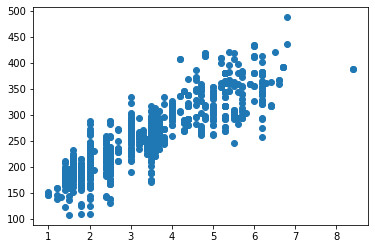

In [ ]:
plt.scatter(data.ENGINESIZE,data.CO2EMISSIONS)

## Data Preparation / Preprocessing

Membagi data menjadi data train dan test

In [ ]:
np.random.seed(42)
split = np.random.rand(len(data)) < 0.7
train = data[split]
test = data[~split]
print(train.info())
print('-'*20)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 751 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 751 non-null    int64  
 1   MAKE                      751 non-null    object 
 2   MODEL                     751 non-null    object 
 3   VEHICLECLASS              751 non-null    object 
 4   ENGINESIZE                751 non-null    float64
 5   CYLINDERS                 751 non-null    int64  
 6   TRANSMISSION              751 non-null    object 
 7   FUELTYPE                  751 non-null    object 
 8   FUELCONSUMPTION_CITY      751 non-null    float64
 9   FUELCONSUMPTION_HWY       751 non-null    float64
 10  FUELCONSUMPTION_COMB      751 non-null    float64
 11  FUELCONSUMPTION_COMB_MPG  751 non-null    int64  
 12  CO2EMISSIONS              751 non-null    int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 82.1+ KB
None
-

Mendefinisikan variabel train dan test hanya menggunakan kolom `ENGINESIZE` dan `CO2EMISSIONS`

In [ ]:
x_train = np.asanyarray(train[['ENGINESIZE']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])

x_test = np.asanyarray(test[['ENGINESIZE']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])

## Modeling

Untuk membentuk model polynimial regression, menggunakan `PolynimialFeatures` dari `sklearn.preprocessing`

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_train_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

Aplikasikan `x_train_poly` sebagai data train yang akan dilatih dengan `LinearRegression()`

In [ ]:
from sklearn import linear_model

poly_model = linear_model.LinearRegression()
poly_model.fit(x_train_poly, y_train)

# Coefficient dan Intercept
print('Coefficient',poly_model.coef_)
print('Intercept',poly_model.intercept_)

Coefficient [[ 0.         48.46831751 -1.20019643]]
Intercept [109.55714002]


## Visualisasi Polynimial Regression

Text(0, 0.5, 'Emission')

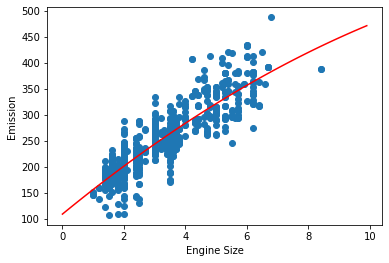

In [ ]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS)

xx = np.arange(0.0,10.0,0.1)
yy = poly_model.intercept_[0] + poly_model.coef_[0][1] * xx + poly_model.coef_[0][2] * np.power(xx, 2)

plt.plot(xx, yy, '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')